In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import comb

In [ ]:
k_on = 1e5
k_off = 1e-4
q_on = 6.5e5
q_off = 4.7e-3
A0 = 1e-10

Single avidity binding event gating model assuming constant antibody conecntration

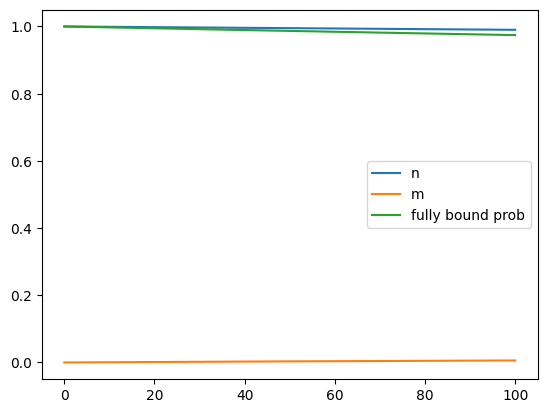

In [78]:
def model_noA(t, z, A0):

    dn = k_on*A0*(1-z[0]) - k_off*z[0] + q_on*A0*(1-z[0])*z[1]
    dm = q_on*A0*(1-z[1]) - q_off*z[1] + k_on*A0*(1-z[1])*z[0]

    dz = [dn, dm]

    return dz


t = t = np.geomspace(1e-6, 100, 10000)
tspan = [1e-6, 100]

z = solve_ivp(model_noA, tspan, [1, 0], args = (1e-10, ), method='Radau', t_eval=t)

n_vals = z.y[0]
m_vals = z.y[1]
fully_bound_prob = (n_vals**2)*(m_vals)

plt.plot(t, n_vals, label = 'n')
plt.plot(t, m_vals, label='m')
plt.plot(t, fully_bound_prob, label = 'fully bound prob')
plt.legend()
plt.show()

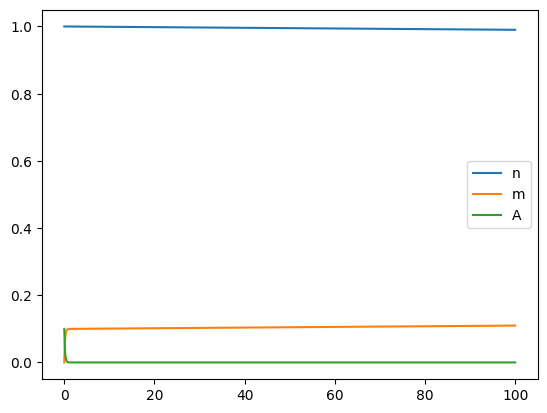

In [69]:
def model(t, z, A0):

    dn = k_on*z[2]*A0*(1-z[0]) - k_off*z[0]
    dm = q_on*z[2]*A0*(1-z[1]) - q_off*z[1]
    dA = -k_on*z[2]*A0*(1-z[0]) - q_on*z[2]*A0*(1-z[1]) + k_off*z[0] + q_off*z[1]

    dz = [dn, dm, dA]

    return dz


t = t = np.geomspace(1e-6, 100, 10000)
tspan = [1e-6, 100]

z = solve_ivp(model, tspan, [1, 0, 0.1], args = (1e-5, ), method='Radau', t_eval=t)

n_vals = z.y[0]
m_vals = z.y[1]
A_vals = z.y[2]

plt.plot(t, n_vals, label = 'n')
plt.plot(t, m_vals, label='m')
plt.plot(t, A_vals, label ='A')
plt.legend()
plt.show()